In [1]:
# comando de Jupyter para que las imagenes se muestren automaticamente 
%matplotlib inline

import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


# Carga Datos

In [2]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
# summarize loaded dataset
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


In [4]:
n,h,w,c = x_train.shape
classes=int(y_train.max()+1)

# Visualización

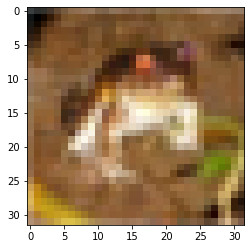

In [5]:
plt.imshow(x_train[0,:,:,:]) #se incluye la dimensión de canales

# Normalización

In [6]:
# Aca hacerlo por canal
for i in range(c):
    x_train = (x_train - x_train.mean()) / x_train.std()
    x_test = (x_test - x_test.mean()) / x_test.std()

In [7]:
print ("mean: ",x_train.mean())
print ("std: ",x_train.std())

mean:  -4.440892098500626e-18
std:  1.0000000000000002


# Sin CNN CIFAR10

Entrene un modelo para clasificar las imágenes, utilizando una softmax en la capa de salida y la entropía cruzada como función de error.  Mida el error y el accuracy en el conjunto de test (y el de train). Compute la matriz de confusión, pero antes de mirarla ¿qué pares de clases te parece que van a confundirse más? Recuerde normalizar los datos con anterioridad. En este caso, la normalización debe realizarse por cada canal.

In [8]:
es = EarlyStopping(monitor='val_acc', mode='min', patience=10, verbose=1)

model = Sequential()
model.add(Flatten(input_shape=(32,32,3)))
model.add(Dense(32,activation='relu'))
model.add(Dense(classes, activation='softmax'))
model.compile(
  optimizer=keras.optimizers.Adam(lr=0.001,beta_1=0.9,beta_2=0.999,amsgrad=False), 
  loss='sparse_categorical_crossentropy', 
  # metricas para ir calculando en cada iteracion o batch 
  # Agregamos el accuracy del modelo
  metrics=['accuracy'], 
)

In [9]:
# Entrenamiento del modelo
model.fit(x_train, y_train, epochs=10, batch_size=16, validation_data=(x_test,y_test), callbacks=[es])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 6s 127us/step - loss: 1.8940 - acc: 0.3662 - val_loss: 1.6102 - val_acc: 0.4343
Epoch 2/10
50000/50000 [==============================] - 6s 127us/step - loss: 1.5904 - acc: 0.4393 - val_loss: 1.5920 - val_acc: 0.4382
Epoch 3/10
50000/50000 [==============================] - 6s 121us/step - loss: 1.5293 - acc: 0.4614 - val_loss: 1.5507 - val_acc: 0.4509
Epoch 4/10
50000/50000 [==============================] - 6s 116us/step - loss: 1.4861 - acc: 0.4754 - val_loss: 1.5374 - val_acc: 0.4577
Epoch 5/10
50000/50000 [==============================] - 6s 121us/step - loss: 1.4590 - acc: 0.4838 - val_loss: 1.5428 - val_acc: 0.4615
Epoch 6/10
50000/50000 [==============================] - 6s 127us/step - loss: 1.4328 - acc: 0.4918 - val_loss: 1.5068 - val_acc: 0.4679
Epoch 7/10
50000/50000 [===

In [10]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                98336     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 98,666
Trainable params: 98,666
Non-trainable params: 0
_________________________________________________________________
None


In [11]:
#Confution Matrix and Classification Report
y_pred = model.predict(x_test)
y_pred_labels = np.argmax(y_pred,axis = 1) 

In [12]:
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_labels))

Confusion Matrix
[[475  39  73   3  24  23  24  20 213 106]
 [ 37 525  32   4  22  12  20  15 105 228]
 [ 74  18 387  20 196  89  82  57  37  40]
 [ 49  23 131  94  92 294 133  43  60  81]
 [ 51  12 180  10 482  55  84  53  42  31]
 [ 18  18 150  77  90 400  78  67  52  50]
 [ 12  19  94  32 186  56 511  19  35  36]
 [ 55  21  89  21 117  88  28 474  27  80]
 [ 95  52  16   3  23  24   7   8 643 129]
 [ 47 161  24   8  18  18  25  19  56 624]]


In [13]:
print('Classification Report')
#target_names = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
print(classification_report(y_test, y_pred_labels))
#print(classification_report(Y_test, y_pred_labels, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

           0       0.52      0.47      0.50      1000
           1       0.59      0.53      0.56      1000
           2       0.33      0.39      0.36      1000
           3       0.35      0.09      0.15      1000
           4       0.39      0.48      0.43      1000
           5       0.38      0.40      0.39      1000
           6       0.52      0.51      0.51      1000
           7       0.61      0.47      0.53      1000
           8       0.51      0.64      0.57      1000
           9       0.44      0.62      0.52      1000

    accuracy                           0.46     10000
   macro avg       0.46      0.46      0.45     10000
weighted avg       0.46      0.46      0.45     10000



# CNN en CIFAR10

In [17]:
input_shape = (32, 32, 3)

## Modelo 1

In [18]:
es = EarlyStopping(monitor='val_acc', mode='min', patience=5, verbose=1)

model = Sequential()
model.add(Conv2D(64, kernel_size = 7, activation='relu', input_shape=(input_shape), strides = 1))
model.add(MaxPooling2D(pool_size=(2,2), strides = 2))
model.add(Flatten())
model.add(Dense(classes, activation='softmax'))

model.compile(
  optimizer=keras.optimizers.Adam(lr=0.001,beta_1=0.9,beta_2=0.999,amsgrad=False), 
  loss='sparse_categorical_crossentropy', 
  # metricas para ir calculando en cada iteracion o batch 
  # Agregamos el accuracy del modelo
  metrics=['accuracy'], 
)

In [19]:
# Entrenamiento del modelo
model.fit(x_train, y_train, epochs=10, batch_size=16, validation_data=(x_test,y_test), callbacks=[es])

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 42s 842us/step - loss: 1.4727 - acc: 0.5003 - val_loss: 1.2561 - val_acc: 0.5733
Epoch 2/10
50000/50000 [==============================] - 43s 860us/step - loss: 1.2290 - acc: 0.5921 - val_loss: 1.2491 - val_acc: 0.5894
Epoch 3/10
50000/50000 [==============================] - 43s 866us/step - loss: 1.1572 - acc: 0.6138 - val_loss: 1.2304 - val_acc: 0.5995
Epoch 4/10
50000/50000 [==============================] - 41s 828us/step - loss: 1.1140 - acc: 0.6309 - val_loss: 1.3264 - val_acc: 0.5742
Epoch 5/10
50000/50000 [==============================] - 42s 849us/step - loss: 1.0678 - acc: 0.6462 - val_loss: 1.2562 - val_acc: 0.5992
Epoch 6/10
50000/50000 [==============================] - 47s 933us/step - loss: 1.0230 - acc: 0.6592 - val_loss: 1.3086 - val_acc: 0.5891
Epoch 00006: early stopping


In [20]:
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 64)        9472      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                108170    
Total params: 117,642
Trainable params: 117,642
Non-trainable params: 0
_________________________________________________________________
None


In [21]:
#Confution Matrix and Classification Report
y_pred = model.predict(x_test)
y_pred_labels = np.argmax(y_pred,axis = 1) 

In [22]:
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_labels))

Confusion Matrix
[[561  56 153  15  55   8  31  20  69  32]
 [ 46 753  28  18   9  12  12  12  22  88]
 [ 48   7 537  61 106  96  79  45  12   9]
 [ 21  21 125 404  86 187  88  42  15  11]
 [ 20   7 130  67 576  43  79  71   6   1]
 [ 10  15 150 185  68 446  44  60  14   8]
 [  3   6  56  79  65  28 746  13   2   2]
 [ 20   9  83  53  93  68  13 648   2  11]
 [120  93  55  19  21   7  22   9 597  57]
 [ 63 155  31  22  17  13  23  33  20 623]]


In [23]:
print('Classification Report')
#target_names = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
print(classification_report(y_test, y_pred_labels))
#print(classification_report(Y_test, y_pred_labels, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

           0       0.62      0.56      0.59      1000
           1       0.67      0.75      0.71      1000
           2       0.40      0.54      0.46      1000
           3       0.44      0.40      0.42      1000
           4       0.53      0.58      0.55      1000
           5       0.49      0.45      0.47      1000
           6       0.66      0.75      0.70      1000
           7       0.68      0.65      0.66      1000
           8       0.79      0.60      0.68      1000
           9       0.74      0.62      0.68      1000

    accuracy                           0.59     10000
   macro avg       0.60      0.59      0.59     10000
weighted avg       0.60      0.59      0.59     10000



## Modelo 2

In [24]:
es = EarlyStopping(monitor='val_acc', mode='min', patience=5, verbose=1)

model = Sequential()
model.add(Conv2D(128, kernel_size = 7, activation='relu', input_shape=(input_shape), strides = 1))
model.add(MaxPooling2D(pool_size=(2,2), strides = 2))
model.add(Flatten())
model.add(Dense(classes, activation='softmax'))

model.compile(
  optimizer=keras.optimizers.Adam(lr=0.001,beta_1=0.9,beta_2=0.999,amsgrad=False), 
  loss='sparse_categorical_crossentropy', 
  # metricas para ir calculando en cada iteracion o batch 
  # Agregamos el accuracy del modelo
  metrics=['accuracy'], 
)

In [25]:
# Entrenamiento del modelo
model.fit(x_train, y_train, epochs=10, batch_size=16, validation_data=(x_test,y_test), callbacks=[es])

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 78s 2ms/step - loss: 1.5254 - acc: 0.4958 - val_loss: 1.2684 - val_acc: 0.5810
Epoch 2/10
50000/50000 [==============================] - 86s 2ms/step - loss: 1.2579 - acc: 0.5849 - val_loss: 1.2199 - val_acc: 0.5948
Epoch 3/10
50000/50000 [==============================] - 79s 2ms/step - loss: 1.1828 - acc: 0.6099 - val_loss: 1.2623 - val_acc: 0.5863
Epoch 4/10
50000/50000 [==============================] - 88s 2ms/step - loss: 1.1314 - acc: 0.6263 - val_loss: 1.2231 - val_acc: 0.6053
Epoch 5/10
50000/50000 [==============================] - 89s 2ms/step - loss: 1.0823 - acc: 0.6426 - val_loss: 1.2217 - val_acc: 0.6022
Epoch 6/10
50000/50000 [==============================] - 90s 2ms/step - loss: 1.0283 - acc: 0.6578 - val_loss: 1.2770 - val_acc: 0.5931
Epoch 00006: early stopping
